In [61]:
import numpy as np
import pandas as pd 
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from matplotlib import rcParams


In [62]:
#reading the data
df=pd.read_excel("Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.xlsx") 

In [63]:
df.columns

Index(['Data as of', 'Start week', 'End Week', 'State', 'Sex', 'Age group',
       'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

In [64]:
df.describe()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,1108.000000,1223.000000,1095.000000,1082.000000,888.000000,1068.000000
mean,316.914260,5048.172527,512.487671,142.806839,51.849099,747.797753
std,2298.852663,37214.143078,3609.370748,1025.191058,334.950281,5205.055289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,303.000000,28.000000,0.000000,0.000000,40.000000
75%,45.000000,1656.000000,145.000000,19.750000,19.000000,202.000000
max,44016.000000,771637.000000,70251.000000,19453.000000,5971.000000,99942.000000


In [65]:
df.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,Under 1 year,4.0,3951.0,36.0,1.0,11.0,50.0,NaN
1,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,1-4 years,2.0,780.0,33.0,2.0,33.0,66.0,NaN
2,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,5-14 years,4.0,1146.0,38.0,0.0,41.0,83.0,NaN
3,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,15-24 years,48.0,6843.0,143.0,18.0,41.0,211.0,NaN
4,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,25-34 years,317.0,14629.0,496.0,134.0,133.0,800.0,NaN


In [66]:

df.rename(columns={'Start week':'Start_week','End Week':'End_Week','Age group':'Age_group','COVID-19 Deaths':'COVID-19_Deaths',
                   'Total Deaths':'Total_Deaths','Pneumonia Deaths':'Pneumonia_Deaths','Pneumonia and COVID-19 Deaths':'Pneumonia_COVID-19_Deaths',
                     'Influenza Deaths':'Influenza_Deaths','Pneumonia, Influenza, or COVID-19 Deaths': 'P_I_C_deaths'}, inplace=True)



In [67]:
df.State.unique()

array(['United States', 'United States Total', 'Alabama', 'Alabama Total',
       'Alaska', 'Alaska Total', 'Arizona', 'Arizona Total', 'Arkansas',
       'Arkansas Total', 'California', 'California Total', 'Colorado',
       'Colorado Total', 'Connecticut', 'Connecticut Total', 'Delaware',
       'Delaware Total', 'District of Columbia',
       'District of Columbia Total', 'Florida', 'Florida Total',
       'Georgia', 'Georgia Total', 'Hawaii', 'Hawaii Total', 'Idaho',
       'Idaho Total', 'Illinois', 'Illinois Total', 'Indiana',
       'Indiana Total', 'Iowa', 'Iowa Total', 'Kansas', 'Kansas Total',
       'Kentucky', 'Kentucky Total', 'Louisiana', 'Louisiana Total',
       'Maine', 'Maine Total', 'Maryland', 'Maryland Total',
       'Massachusetts', 'Massachusetts Total', 'Michigan',
       'Michigan Total', 'Minnesota', 'Minnesota Total', 'Mississippi',
       'Mississippi Total', 'Missouri', 'Missouri Total', 'Montana',
       'Montana Total', 'Nebraska', 'Nebraska Total', 'Neva

In [68]:
df.head(15)

,Data as of,Start_week,End_Week,State,Sex,Age_group,COVID-19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_COVID-19_Deaths,Influenza_Deaths,P_I_C_deaths,Footnote
0,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,Under 1 year,4.0,3951.0,36.0,1.0,11.0,50.0,NaN
1,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,1-4 years,2.0,780.0,33.0,2.0,33.0,66.0,NaN
2,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,5-14 years,4.0,1146.0,38.0,0.0,41.0,83.0,NaN
3,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,15-24 years,48.0,6843.0,143.0,18.0,41.0,211.0,NaN
4,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,25-34 years,317.0,14629.0,496.0,134.0,133.0,800.0,NaN
5,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,35-44 years,796.0,21021.0,1109.0,307.0,210.0,1784.0,NaN
6,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,45-54 years,2262.0,40725.0,2951.0,943.0,522.0,4699.0,NaN
7,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,55-64 years,5422.0,97716.0,8521.0,2390.0,1108.0,12464.0,NaN
8,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,65-74 years,9359.0,151727.0,14646.0,4164.0,1305.0,20935.0,NaN
9,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,75-84 years,12026.0,190511.0,19415.0,5461.0,1328.0,27141.0,NaN


In [69]:
df["Age_group"]= df["Age_group"].replace({'Under 1 year':'less_than_1_year','1-4 years':'1_to_4','5-14 years':'5_to_14','15-24 years':'15_to_24',
       '25-34 years':'25_to_34', '35-44 years':'35_to_44', '45-54 years':'45_to_54', '55-64 years':'55_to_64',
      '65-74 years':'65_to_74', '75-84 years':'75_to_84', '85 years and over':'more_than_85','Female, all ages':'Female_all',
                                          'All ages':'All_age','Male, all ages':'Male_all','All Ages':'All_age'}) 

In [70]:
df.head()

,Data as of,Start_week,End_Week,State,Sex,Age_group,COVID-19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_COVID-19_Deaths,Influenza_Deaths,P_I_C_deaths,Footnote
0,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,less_than_1_year,4.0,3951.0,36.0,1.0,11.0,50.0,NaN
1,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,1_to_4,2.0,780.0,33.0,2.0,33.0,66.0,NaN
2,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,5_to_14,4.0,1146.0,38.0,0.0,41.0,83.0,NaN
3,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,15_to_24,48.0,6843.0,143.0,18.0,41.0,211.0,NaN
4,2020-05-06,2020-02-01,2020-05-02,United States,All Sexes,25_to_34,317.0,14629.0,496.0,134.0,133.0,800.0,NaN


In [71]:
states=['Alabama',
       'Alaska', 'Arizona',  'Arkansas',
       'California',  'Colorado',
        'Connecticut',  'Delaware',
       'District of Columbia',
        'Florida', 
       'Georgia', 'Hawaii', 'Idaho',
        'Illinois',  'Indiana',
       'Iowa',  'Kansas', 
       'Kentucky',  'Louisiana', 
       'Maine',  'Maryland', 
       'Massachusetts',  'Michigan',
        'Minnesota', 'Mississippi',
        'Missouri', 'Montana',
        'Nebraska',  'Nevada',
       'New Hampshire', 
       'New Jersey', 'New Mexico', 
       'New York',  'New York City',
        'North Carolina', 
       'North Dakota',  'Ohio', 
       'Oklahoma',  'Oregon', 
       'Pennsylvania', 'Rhode Island',
        'South Carolina', 
       'South Dakota',  'Tennessee',
      'Texas', 'Utah', 
       'Vermont',  'Virginia', 
       'Washington',  'West Virginia',
        'Wisconsin', 'Wyoming',
    'Puerto Rico', ]

In [72]:
df.State.value_counts()

United States           37
Missouri                25
West Virginia           25
Virginia                25
North Dakota            25
                        ..
Minnesota Total          1
New Jersey Total         1
Nebraska Total           1
Indiana Total            1
South Carolina Total     1
Name: State, Length: 108, dtype: int64

In [73]:
df = df[['State', 'Age_group', 'COVID-19_Deaths','Total_Deaths']]

In [74]:
df_5_6 = df.fillna(0)

In [75]:
df_5_6

,State,Age_group,COVID-19_Deaths,Total_Deaths
0,United States,less_than_1_year,4.0,3951.0
1,United States,1_to_4,2.0,780.0
2,United States,5_to_14,4.0,1146.0
3,United States,15_to_24,48.0,6843.0
4,United States,25_to_34,317.0,14629.0
...,...,...,...,...
1411,Puerto Rico,75_to_84,0.0,0.0
1412,Puerto Rico,more_than_85,0.0,0.0
1413,Puerto Rico,Female_all,0.0,188.0
1414,Puerto Rico,All_age,0.0,0.0


In [76]:
df_5_6_final=df_5_6[~df_5_6.State.str.contains("United States")]

In [77]:
df_5_6_final.head()

,State,Age_group,COVID-19_Deaths,Total_Deaths
38,Alabama,less_than_1_year,0.0,39.0
39,Alabama,1_to_4,0.0,0.0
40,Alabama,5_to_14,0.0,17.0
41,Alabama,15_to_24,0.0,95.0
42,Alabama,25_to_34,0.0,169.0


In [78]:
df_5_6_final.tail()

,State,Age_group,COVID-19_Deaths,Total_Deaths
1411,Puerto Rico,75_to_84,0.0,0.0
1412,Puerto Rico,more_than_85,0.0,0.0
1413,Puerto Rico,Female_all,0.0,188.0
1414,Puerto Rico,All_age,0.0,0.0
1415,Puerto Rico Total,All_age,13.0,581.0


In [79]:
string_list=['Female_all','All_age','Male_all']
df_5_6_final = df_5_6_final[~df_5_6_final['Age_group'].isin(string_list)]

In [80]:
df_5_6_final.tail()

,State,Age_group,COVID-19_Deaths,Total_Deaths
1408,Puerto Rico,45_to_54,0.0,111.0
1409,Puerto Rico,55_to_64,0.0,0.0
1410,Puerto Rico,65_to_74,0.0,0.0
1411,Puerto Rico,75_to_84,0.0,0.0
1412,Puerto Rico,more_than_85,0.0,0.0


In [81]:
df_5_6_final['avg_death']=df_5_6_final['COVID-19_Deaths']/df_5_6_final['Total_Deaths']

In [82]:
df_5_6_final.head()

,State,Age_group,COVID-19_Deaths,Total_Deaths,avg_death
38,Alabama,less_than_1_year,0.0,39.0,0.0
39,Alabama,1_to_4,0.0,0.0,NaN
40,Alabama,5_to_14,0.0,17.0,0.0
41,Alabama,15_to_24,0.0,95.0,0.0
42,Alabama,25_to_34,0.0,169.0,0.0


In [83]:
df_5_6_final = df_5_6_final.fillna(0)

In [84]:
df_5_6_final.head(15)

,State,Age_group,COVID-19_Deaths,Total_Deaths,avg_death
38,Alabama,less_than_1_year,0.0,39.0,0.000000
39,Alabama,1_to_4,0.0,0.0,0.000000
40,Alabama,5_to_14,0.0,17.0,0.000000
41,Alabama,15_to_24,0.0,95.0,0.000000
42,Alabama,25_to_34,0.0,169.0,0.000000
43,Alabama,35_to_44,0.0,251.0,0.000000
44,Alabama,45_to_54,14.0,505.0,0.027723
45,Alabama,55_to_64,16.0,1174.0,0.013629
46,Alabama,65_to_74,41.0,1655.0,0.024773
47,Alabama,75_to_84,31.0,1710.0,0.018129


In [85]:
#df_try=df_5_6_final.groupby('Age_group').set_index('Age_group')

In [86]:
df_5_6_final.Age_group=pd.Categorical(df_5_6_final.Age_group,categories=['less_than_1_year','1_to_4','5_to_14','15_to_24',
       '25_to_34', '35_to_44', '45_to_54', '55_to_64','65_to_74', '75_to_84', 'more_than_85'])
df_5_6_final=df_5_6_final.sort_values('Age_group')
df_5_6_final

,State,Age_group,COVID-19_Deaths,Total_Deaths,avg_death
38,Alabama,less_than_1_year,0.0,39.0,0.000000
466,Kansas,less_than_1_year,0.0,18.0,0.000000
480,Kentucky,less_than_1_year,0.0,19.0,0.000000
492,Kentucky,less_than_1_year,0.0,18.0,0.000000
506,Louisiana,less_than_1_year,0.0,38.0,0.000000
...,...,...,...,...,...
932,North Carolina,more_than_85,0.0,1366.0,0.000000
944,North Carolina,more_than_85,0.0,2259.0,0.000000
958,North Dakota,more_than_85,0.0,211.0,0.000000
658,Minnesota,more_than_85,66.0,2781.0,0.023732


In [87]:
#pd.pivot_table(df_5_6_final, values = 'avg_death', index=['Age_group'], columns = 'State').reindex(columns='Age_group')

In [88]:
df_5_6_2020=pd.pivot_table(df_5_6_final, values = 'avg_death', index=['Age_group'], columns = 'State').reset_index()

In [89]:
df_5_6_2020

State,Age_group,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,less_than_1_year,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,1_to_4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,5_to_14,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,15_to_24,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,25_to_34,0.000000,0.0,0.000000,0.000000,0.005814,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
5,35_to_44,0.000000,0.0,0.000000,0.000000,0.020598,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
6,45_to_54,0.013861,0.0,0.000000,0.000000,0.022932,0.024814,0.000000,0.000000,0.000000,...,0.0,0.000000,0.012289,0.0,0.000000,0.008580,0.013105,0.0,0.016393,0.0
7,55_to_64,0.014990,0.0,0.019030,0.000000,0.016174,0.027428,0.050847,0.000000,0.000000,...,0.0,0.005208,0.009878,0.0,0.000000,0.017841,0.027942,0.0,0.018214,0.0
8,65_to_74,0.020387,0.0,0.016288,0.000000,0.020274,0.058239,0.156547,0.024155,0.104361,...,0.0,0.008139,0.011770,0.0,0.000000,0.022226,0.034624,0.0,0.019788,0.0
9,75_to_84,0.015393,0.0,0.018894,0.005757,0.021461,0.068798,0.171975,0.021569,0.000000,...,0.0,0.008879,0.010403,0.0,0.029915,0.021317,0.046074,0.0,0.021295,0.0


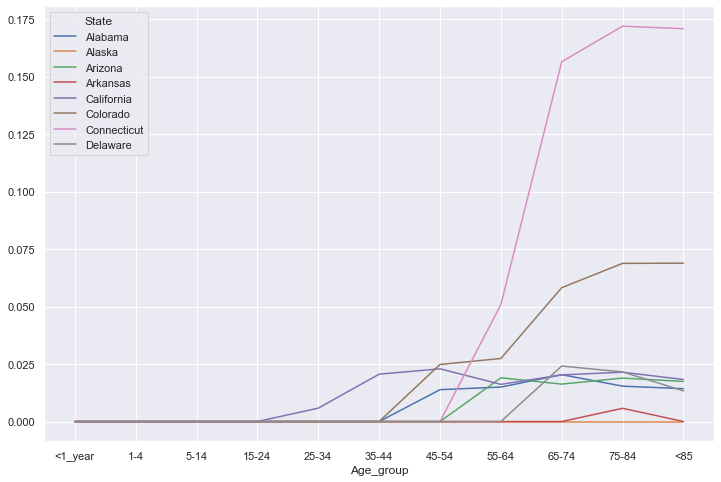

In [115]:
df_5_6_2020.plot('Age_group',y=['Alabama','Alaska','Arizona','Arkansas',
                                'California','Colorado','Connecticut','Delaware'])
#plt.xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])
plt.xticks(np.arange(11),['<1_year','1-4','5-14','15-24',
       '25-34', '35-44', '45-54', '55-64','65-74', '75-84', '<85'])
plt.show()

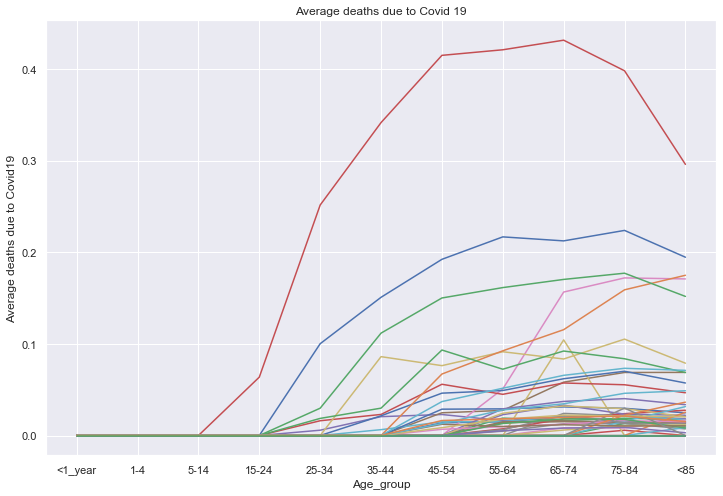

In [114]:
plt.rcParams["figure.figsize"] = [12, 8]

df_5_6_2020.set_index('Age_group').plot(legend=False);
plt.xlabel ('Age_group')
plt.xticks(np.arange(11),['<1_year','1-4','5-14','15-24',
       '25-34', '35-44', '45-54', '55-64','65-74', '75-84', '<85'])
plt.ylabel ('Average deaths due to Covid19')
plt.title ('Average deaths due to Covid 19')
#plt.grid()
plt.show() 